In [ ]:
!pip install pyspellchecker
!pip install --upgrade scipy
!pip install numpy
!pip install emoji
!pip install nltk
!pip install spacy==3.5.0
!pip install spacy-transformers==1.1.5
!pip install transformers datasets accelerate bitsandbytes
!pip install -U sentence-transformers
!pip install swifter

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.8/6.8 MB 14.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.8/60.8 kB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.2/41.2 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python3 -m spacy download en_core_web_sm
!python3 -m spacy download ru_core_news_sm

2024-11-15 20:24:14.059058: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-15 20:24:14.163594: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-15 20:24:14.185511: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-15 20:24:14.245772: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-15 20:24:16.769043: W tensorflow/compiler/tf2

In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from spellchecker import SpellChecker
from sklearn.metrics import classification_report
import re
import nltk
from nltk.corpus import stopwords
import emoji
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from transformers import BertTokenizerFast

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Load the spaCy models
nlp_en = spacy.load('en_core_web_sm')
nlp_ru = spacy.load('ru_core_news_sm')

In [ ]:
spell_en = SpellChecker(language='en')
spell_ru = SpellChecker(language='ru')

# Define Classes and Functions to be used throughout Notebook

In [ ]:
import emoji

# Cell 2: Data Preprocessing Class
class DataPreprocessor:
    def __init__(self, lang):
        self.lang = lang
        self.spell_checker = SpellChecker(language=self.lang)

    def clean_text(self, text):
        text = text.lower()
        text = self.remove_special_chars(text)
        #text = self.spell_check(text)
        text = self.remove_stop_words(text)
        #text = self.apply_encoding(text)
        return text

    def remove_special_chars(self, text):
        # Remove URLs, mentions, hashtags, and non-alphanumeric characters but preserve spaces
        text = re.sub(r'(https?://\S+|www\.\S+|@\S+|#\S+)', '', text)  # Remove URLs, mentions, hashtags
        text = re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø\s]', '', text)  # Remove non-alphanumeric characters but preserve spaces (including Cyrillic for Russian)
        return text

    def spell_check(self, text):
        misspelled = self.spell_checker.unknown(text.split())
        for word in misspelled:
            correction = self.spell_checker.correction(word)
            if correction is not None:
                text = text.replace(word, correction)
        return text

    def apply_encoding(self, text):
        text = str(text)
        return text.encode('utf-8', errors='replace').decode('utf-8')

    def remove_stop_words(self, text):
        words = text.split()

        if self.lang == 'en':
            english_stop_words = set(stopwords.words('english'))
            words = [word for word in words if word not in english_stop_words]

        elif self.lang == 'ru':
            russian_stop_words = set(stopwords.words('russian'))
            words = [word for word in words if word not in russian_stop_words]

        return ' '.join(words)


In [ ]:
import pandas as pd

def extract_sentiment(doc, lang):
        if lang == 'English':
            if '1 star' in doc.cats or '2 star' in doc.cats:
                  return 'positive'
            elif '4 star' in doc.cats or '5 star' in doc.cats:
                  return 'positive'
            elif '3 star' in doc.cats:
                  return 'neutral'
            else:
                  return 'neutral'

        elif lang == 'Russian':
          if doc:
              if 'positive' in doc.cats:
                  return 'positive'
              elif 'negative' in doc.cats:
                  return 'negative'
              else:
                  return 'neutral'
          else:
              return None

def analyze_long_texts_batch(texts, chunk_size=512, overlap=128, batch_size=10):
    all_sentiments = []
    for i in range(0, len(texts), batch_size):
        print("iterating...")
        batch_texts = texts[i:i + batch_size]
        batch_sentiments = []
        for text in batch_texts:
            chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size - overlap)]
            # Process all chunks in a single batch using nlp.pipe
            chunk_sentiments = [extract_sentiment(doc, 'Russian') for doc in nlp_ru.pipe(chunks, batch_size=len(chunks))]
            batch_sentiments.append(max(set(chunk_sentiments), key=chunk_sentiments.count) if chunk_sentiments else "NEUTRAL")
        all_sentiments.extend(batch_sentiments)
    return all_sentiments

In [ ]:
import pandas as pd
from transformers import AutoModelForMaskedLM, AutoTokenizer
import torch
import random

class DataAugmentor:
      def __init__(self, lang):
        self.lang = lang
        self.tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
        self.model = AutoModelForMaskedLM.from_pretrained("DeepPavlov/rubert-base-cased")

      def replace_word_with_synonym(self, text, top_k=5):
                tokens = self.tokenizer.tokenize(text)

                candidate_indices = [i for i, token in enumerate(tokens) if token not in self.tokenizer.all_special_tokens] # Select a random word (ignoring special tokens) and its index
                if not candidate_indices:
                    return [text]

                random_idx = random.choice(candidate_indices)
                word_to_mask = tokens[random_idx]

                # Replace the selected word with [MASK]
                tokens[random_idx] = self.tokenizer.mask_token
                masked_text = self.tokenizer.convert_tokens_to_string(tokens)

                inputs = self.tokenizer(masked_text, return_tensors="pt") # Prepare input for the model
                mask_token_index = torch.where(inputs.input_ids == self.tokenizer.mask_token_id)[1]

                with torch.no_grad():
                    token_logits = self.model(**inputs).logits
                mask_token_logits = token_logits[0, mask_token_index, :]
                top_tokens = torch.topk(mask_token_logits, top_k, dim=1).indices[0].tolist()

                synonyms = [self.tokenizer.decode([token]).strip() for token in top_tokens]

                sentences_with_synonyms = []
                for synonym in synonyms:
                    # Replace the masked token with the synonym
                    new_tokens = tokens[:]
                    new_tokens[random_idx] = synonym
                    new_sentence = self.tokenizer.convert_tokens_to_string(new_tokens)
                    sentences_with_synonyms.append(new_sentence)

                return sentences_with_synonyms


      def random_deletion(self, text, p=0.1):
            text = str(text)
            words = text.split()
            if len(words) == 1:
                return text
            remaining_words = [word for word in words if random.uniform(0, 1) > p]
            return ' '.join(remaining_words) if remaining_words else text

In [ ]:
def apply_sentiment_analysis(row):
    content = row['cleaned_text']
    language = row['language']

    if language == 'English':
        doc = nlp_en(content)
        sentiment = extract_sentiment(doc, 'English')
    elif language == 'Russian':
        doc = nlp_ru(content)
        sentiment = extract_sentiment(doc, 'Russian')
    else:
        sentiment = None  # Skip if language is not English or Russian

    return sentiment

In [ ]:
def apply_sentiment_analysis_for_russian_sentiment_analysis_dataset(row):
    content = row['text']
    if len(content) > 512:
        sentiment = analyze_long_texts_batch(content)
    else:
        doc = nlp_ru(content)
        sentiment = extract_sentiment(doc, 'Russian')
    return sentiment

In [ ]:
from enum import Enum

class Language(Enum):
    ENGLISH = "English"
    RUSSIAN = "Russian"
    # could be extended depending on the datasets

# Load Troll Tweet Dataset & Run Sentiment Analysis with Pre-trained Models

In [69]:
columns_to_del = ['external_author_id', 'author', 'updates', 'account_type', 'new_june_2018', 'retweet', 'account_category']
russian_tweet_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle russian troll tweets/IRAhandle_tweets_1.csv')
russian_tweet_set = russian_tweet_set.drop(columns=columns_to_del)

display(russian_tweet_set)

content         region  \
0       "We have a sitting Democrat US Senator on tria...        Unknown   
1       Marshawn Lynch arrives to game in anti-Trump s...        Unknown   
2       Daughter of fallen Navy Sailor delivers powerf...        Unknown   
3       JUST IN: President Trump dedicates Presidents ...        Unknown   
4       19,000 RESPECTING our National Anthem! #StandF...        Unknown   
...                                                   ...            ...   
381011  ICYMI, @SabrinaAnnLynn dropped a lyric video f...  United States   
381012  WorldStarHipHop Founder Lee "Q" O'Denat Dies a...  United States   
381013  ‚ÄúThis world is but a canvas to our imagination...  United States   
381014  House Republicans release bill that would dism...  United States   
381015  Retweeted Citizen TV Kenya (@citizentvkenya): ...  United States   

       language     publish_date   harvested_date  following  followers  \
0       English  10/1/2017 19:58  10/1/2017 19:59       1052       9636   
1       English  10/1/2017 22:43  10/1/2017 22:43       1054       9637   
2       English  10/1/2017 22:50  10/1/2017 22:51       1054       9637   
3       English  10/1/2017 23:52  10/1/2017 23:52       1062       9642   
4       English   10/1/2017 2:13   10/1/2017 2:13       1050       9645   
...         ...              ...              ...        ...        ...   
381011  English    3/7/2017 0:25    3/7/2017 0:25        694        711   
381012  English    3/7/2017 0:25    3/7/2017 0:25        694        711   
381013  English    3/7/2017 0:25    3/7/2017 0:25        694        711   
381014  English    3/7/2017 0:25    3/7/2017 0:25        694        711   
381015  English   3/7/2017 10:27   3/7/2017 10:27        694        712   

       post_type  
0            NaN  
1            NaN  
2        RETWEET  
3            NaN  
4        RETWEET  
...          ...  
381011   RETWEET  
381012   RETWEET  
381013   RETWEET  
381014   RETWEET  
381015   RETWEET  

[381016 rows x 8 columns]

Filter out all languages that aren't English or Russian

In [70]:
russian_tweet_set = russian_tweet_set[russian_tweet_set['language'].isin(['English', 'Russian'])]
russian_tweet_set = russian_tweet_set.drop_duplicates()
display(russian_tweet_set)

content         region  \
0       "We have a sitting Democrat US Senator on tria...        Unknown   
1       Marshawn Lynch arrives to game in anti-Trump s...        Unknown   
2       Daughter of fallen Navy Sailor delivers powerf...        Unknown   
3       JUST IN: President Trump dedicates Presidents ...        Unknown   
4       19,000 RESPECTING our National Anthem! #StandF...        Unknown   
...                                                   ...            ...   
381011  ICYMI, @SabrinaAnnLynn dropped a lyric video f...  United States   
381012  WorldStarHipHop Founder Lee "Q" O'Denat Dies a...  United States   
381013  ‚ÄúThis world is but a canvas to our imagination...  United States   
381014  House Republicans release bill that would dism...  United States   
381015  Retweeted Citizen TV Kenya (@citizentvkenya): ...  United States   

       language     publish_date   harvested_date  following  followers  \
0       English  10/1/2017 19:58  10/1/2017 19:59       1052       9636   
1       English  10/1/2017 22:43  10/1/2017 22:43       1054       9637   
2       English  10/1/2017 22:50  10/1/2017 22:51       1054       9637   
3       English  10/1/2017 23:52  10/1/2017 23:52       1062       9642   
4       English   10/1/2017 2:13   10/1/2017 2:13       1050       9645   
...         ...              ...              ...        ...        ...   
381011  English    3/7/2017 0:25    3/7/2017 0:25        694        711   
381012  English    3/7/2017 0:25    3/7/2017 0:25        694        711   
381013  English    3/7/2017 0:25    3/7/2017 0:25        694        711   
381014  English    3/7/2017 0:25    3/7/2017 0:25        694        711   
381015  English   3/7/2017 10:27   3/7/2017 10:27        694        712   

       post_type  
0            NaN  
1            NaN  
2        RETWEET  
3            NaN  
4        RETWEET  
...          ...  
381011   RETWEET  
381012   RETWEET  
381013   RETWEET  
381014   RETWEET  
381015   RETWEET  

[338128 rows x 8 columns]

Preprocess Text

In [71]:
# Process data
import swifter

russian_tweet_set_processed = russian_tweet_set.head(10000).copy()
preprocessor = DataPreprocessor(lang='ru')
#russian_tweet_set['cleaned_text'] = russian_tweet_set['content'].apply(preprocessor.clean_text)
russian_tweet_set_processed['cleaned_text'] = russian_tweet_set_processed['content'].swifter.apply(preprocessor.clean_text)

display(russian_tweet_set_processed)

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

content         region  \
0      "We have a sitting Democrat US Senator on tria...        Unknown   
1      Marshawn Lynch arrives to game in anti-Trump s...        Unknown   
2      Daughter of fallen Navy Sailor delivers powerf...        Unknown   
3      JUST IN: President Trump dedicates Presidents ...        Unknown   
4      19,000 RESPECTING our National Anthem! #StandF...        Unknown   
...                                                  ...            ...   
13488  Remember: Worship is a heart overflowing with ...  United States   
13489  If you don't have a home for your content or l...  United States   
13490  I promise to bring you guys into this with & o...  United States   
13491  Praying for those involved in #HurricaneMatthe...  United States   
13492  Leafly Investigation: The Great Cannabis Crime...  United States   

      language     publish_date   harvested_date  following  followers  \
0      English  10/1/2017 19:58  10/1/2017 19:59       1052       9636   
1      English  10/1/2017 22:43  10/1/2017 22:43       1054       9637   
2      English  10/1/2017 22:50  10/1/2017 22:51       1054       9637   
3      English  10/1/2017 23:52  10/1/2017 23:52       1062       9642   
4      English   10/1/2017 2:13   10/1/2017 2:13       1050       9645   
...        ...              ...              ...        ...        ...   
13488  English   10/6/2016 8:51   10/6/2016 8:51        997       1050   
13489  English   10/7/2016 0:00   10/7/2016 0:01        997       1060   
13490  English   10/7/2016 0:02   10/7/2016 0:03        997       1060   
13491  English   10/7/2016 0:03   10/7/2016 0:03        997       1060   
13492  English   10/7/2016 0:03   10/7/2016 0:03        997       1060   

      post_type                                       cleaned_text  
0           NaN  we have a sitting democrat us senator on trial...  
1           NaN  marshawn lynch arrives to game in antitrump sh...  
2       RETWEET  daughter of fallen navy sailor delivers powerf...  
3           NaN  just in president trump dedicates presidents c...  
4       RETWEET                     respecting our national anthem  
...         ...                                                ...  
13488   RETWEET  remember worship is a heart overflowing with p...  
13489   RETWEET  if you dont have a home for your content or lo...  
13490   RETWEET  i promise to bring you guys into this with oly...  
13491   RETWEET                      praying for those involved in  
13492   RETWEET  leafly investigation the great cannabis crime ...  

[10000 rows x 9 columns]

# LOAD HUGGINGFACE MODELS INTO SPACY

In [ ]:
import spacy
from transformers import pipeline
from spacy.language import Language

@Language.factory("huggingface_sentiment")
def create_huggingface_sentiment_component(nlp, name, model_name):
    sentiment_analyzer = pipeline("sentiment-analysis", model=model_name)

    def component(doc):
        sentiment = sentiment_analyzer(doc.text)[0]
        label = sentiment['label']
        score = sentiment['score']

        doc.cats[label] = score
        return doc

    return component

# Load the spaCy models for English and Russian
nlp_en = spacy.load('en_core_web_sm')
nlp_ru = spacy.load('ru_core_news_sm')

# Add the Hugging Face sentiment components to each pipeline with specified models
nlp_en.add_pipe("huggingface_sentiment", config={"model_name": "nlptown/bert-base-multilingual-uncased-sentiment"})
nlp_ru.add_pipe("huggingface_sentiment", config={"model_name": "blanchefort/rubert-base-cased-sentiment"})


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/943 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/499 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

<function __main__.create_huggingface_sentiment_component.<locals>.component(doc)>

# Process for running Pretrained Model
1.   For each row of tweets in csv, run the sentiment analysis depending on language

2.   Save the sentiment score in a new column 'Sentiment'

3. Then use this DataFrame to make visualisations & metrics



In [ ]:
russian_tweet_set_copy = russian_tweet_set_processed.copy()
russian_tweet_set_copy['sentiment'] = russian_tweet_set_copy.swifter.apply(apply_sentiment_analysis, axis=1)

display(russian_tweet_set_copy)

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/swifter/swifter.py", line 419, in apply
    tmp_df = func(sample, *args, **kwds)
  File "<ipython-input-11-8d32afda63bb>", line 5, in apply_sentiment_analysis
    if language == 'English':
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 1577, in __nonzero__
    raise ValueError(
ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-f1b1143426aa>", line 2, in <cell line: 2>
    russian_tweet_set_copy['sentiment'] = russian_tweet_set_copy.swifter.apply(apply_sentiment_analysis, axis=1)
  File "/usr/local/lib/python3.10/dist-packages/swifte

TypeError: object of type 'NoneType' has no len()

# Visualise Results from Sentiment Analysis

In [ ]:
russian_tweet_set_copy['publish_date'] = pd.to_datetime(russian_tweet_set_copy['publish_date'])

russian_tweet_set_copy.set_index('publish_date', inplace=True)

daily_sentiment = russian_tweet_set_copy.groupby([pd.Grouper(freq='D'), 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
daily_sentiment.plot(ax=plt.gca(), marker='o', linestyle='-')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
russian_tweet_set_copy.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

russian_tweet_set_copy = russian_tweet_set_copy.reset_index()
plt.figure(figsize=(10, 6))
sns.countplot(data=russian_tweet_set_copy, x='sentiment', hue='language', palette='viridis')
plt.title('Sentiment Distribution by Language')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Language')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.scatter(russian_tweet_set_copy.index, russian_tweet_set_copy['sentiment'],
            c=russian_tweet_set_copy['sentiment'], cmap='viridis', alpha=0.6)

plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.yticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])
plt.colorbar(label='Sentiment')
plt.show()

# Run Tests for Test data

Load datasets with russian & sentiment

1. Convert JSON data into Pandas dataframe
2.   Run sentiment analysis for all tweets in DF & log sentiment predicted for each in new column
3.   Make function to iterate over every column & compared predicted to actual
4. Make functions to get accuracy metrics



In [ ]:
# 1. Convert JSON data into Pandas dataframe
import nltk
nltk.download('stopwords')
import pandas as pd
import json

with open('/content/drive/MyDrive/Colab Notebooks/sentiment-analysis-in-russian/train.json', 'r') as f:
    data = json.load(f)

df_russian_sentiment_tweets = pd.DataFrame(data)
df_russian_sentiment_tweets['text'] = df_russian_sentiment_tweets['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df_russian_sentiment_tweets['text'] = df_russian_sentiment_tweets['text'].apply(lambda x: x[:512] if len(x) > 512 else x)

preprocessor = DataPreprocessor(lang='ru')

average_length = df_russian_sentiment_tweets['text'].str.len().mean()
df_russian_sentiment_tweets['cleaned_text'] = df_russian_sentiment_tweets['text'].swifter.apply(preprocessor.clean_text)

display(df_russian_sentiment_tweets)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pandas Apply:   0%|          | 0/8263 [00:00<?, ?it/s]

text     id sentiment  \
0     –î–æ—Å—É–¥–µ–±–Ω–æ–µ —Ä–∞—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –ø–æ —Ñ–∞–∫—Ç—É –ø–æ–∫—É–ø–∫–∏ –ï–ù–ü–§...   1945  negative   
1     –ú–µ–¥–∏–∫–∏ —Ä–∞—Å—Å–∫–∞–∑–∞–ª–∏ –æ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ—Å—Ç—Ä–∞–¥–∞–≤—à–µ–≥–æ –º—É...   1957  negative   
2     –ü—Ä–æ—à–µ–ª –ø–æ—á—Ç–∏ –≥–æ–¥, –∫–∞–∫ –∂–µ–ª–µ–∑–Ω–æ–¥–æ—Ä–æ–∂–Ω—ã–º –æ–ø–µ—Ä–∞—Ç–æ—Ä...   1969  negative   
3     –ü–æ –∏—Ç–æ–≥–∞–º 12 –º–µ—Å—è—Ü–µ–≤ 2016 –≥–æ–¥–∞ –Ω–∞ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ —Ä...   1973  negative   
4     –ê—Å—Ç–∞–Ω–∞. 21 –Ω–æ—è–±—Ä—è. Kazakhstan Today - –ê–≥–µ–Ω—Ç—Å—Ç–≤...   1975  negative   
...                                                 ...    ...       ...   
8258  –ö–∞–∫ –º—ã –ø–∏—Å–∞–ª–∏ –µ—â–µ –≤–µ—Å–Ω–æ–π, –¥–ª—è —É–≤–µ–ª–∏—á–µ–Ω–∏—è —Å–±—ã—Ç–∞...  10312  positive   
8259  –ù–æ –º–æ–ª–æ–¥–æ–π –º–∏–Ω–∏—Å—Ç—Ä –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π —ç–∫–æ–Ω–æ–º–∏–∫–∏ –ë–∏—à–∏...  10313  negative   
8260  \n \n–í –ï–ù–ü–§ –Ω–∞–∑–Ω–∞—á–µ–Ω –Ω–æ–≤—ã–π –ø—Ä–µ–¥—Å–µ–¥–∞—Ç–µ–ª—å –ø—Ä–∞–≤–ª–µ...  10314   neutral   
8261  –í –ê–ª–º–∞—Ç—ã —É –æ—Ç–¥–µ–ª–µ–Ω–∏—è –±–∞–Ω–∫–∞ –ø—Ä–æ–∏–∑–æ—à–ª–æ –Ω–∞–ø–∞–¥–µ–Ω–∏–µ...  10315  negative   
8262  –ù–ü–ü –†–ö ¬´–ê—Ç–∞–º–µ–∫–µ–Ω¬ª –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç —Å–æ–∑–¥–∞—Ç—å –ù–∞—Ü–∏–æ–Ω–∞–ª—å...  10316   neutral   

                                           cleaned_text  
0     –¥–æ—Å—É–¥–µ–±–Ω–æ–µ —Ä–∞—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Ñ–∞–∫—Ç—É –ø–æ–∫—É–ø–∫–∏ –µ–Ω–ø—Ñ –ø–∞...  
1     –º–µ–¥–∏–∫–∏ —Ä–∞—Å—Å–∫–∞–∑–∞–ª–∏ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ—Å—Ç—Ä–∞–¥–∞–≤—à–µ–≥–æ –º—É–∂—á...  
2     –ø—Ä–æ—à–µ–ª –≥–æ–¥ –∂–µ–ª–µ–∑–Ω–æ–¥–æ—Ä–æ–∂–Ω—ã–º –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º –∑–∞–ø—Ä–µ—Ç–∏–ª...  
3     –∏—Ç–æ–≥–∞–º –º–µ—Å—è—Ü–µ–≤ –≥–æ–¥–∞ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ —Ä–µ—Å–ø—É–±–ª–∏–∫–∏ –≤—ã–ø—É...  
4     –∞—Å—Ç–∞–Ω–∞ –Ω–æ—è–±—Ä—è kazakhstan today –∞–≥–µ–Ω—Ç—Å—Ç–≤–æ —Ä–∫ –¥–µ...  
...                                                 ...  
8258  –ø–∏—Å–∞–ª–∏ –≤–µ—Å–Ω–æ–π —É–≤–µ–ª–∏—á–µ–Ω–∏—è —Å–±—ã—Ç–∞ —Ç–∞–∫–∂–µ –∏–∑–±–µ–≥–∞–Ω–∏—è...  
8259  –º–æ–ª–æ–¥–æ–π –º–∏–Ω–∏—Å—Ç—Ä –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π —ç–∫–æ–Ω–æ–º–∏–∫–∏ –±–∏—à–∏–º–±–∞...  
8260  –µ–Ω–ø—Ñ –Ω–∞–∑–Ω–∞—á–µ–Ω –Ω–æ–≤—ã–π –ø—Ä–µ–¥—Å–µ–¥–∞—Ç–µ–ª—å –ø—Ä–∞–≤–ª–µ–Ω–∏—è –µ–¥–∏...  
8261  –∞–ª–º–∞—Ç—ã –æ—Ç–¥–µ–ª–µ–Ω–∏—è –±–∞–Ω–∫–∞ –ø—Ä–æ–∏–∑–æ—à–ª–æ –Ω–∞–ø–∞–¥–µ–Ω–∏–µ —Å—Ç—Ä...  
8262  –Ω–ø–ø —Ä–∫ –∞—Ç–∞–º–µ–∫–µ–Ω –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç —Å–æ–∑–¥–∞—Ç—å –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã...  

[8263 rows x 4 columns]

In [ ]:
df_russian_sentiment_tweet_copy = df_russian_sentiment_tweets.head(100).copy() # Update to 10k
df_russian_sentiment_tweet_copy['predicted_sentiment'] = df_russian_sentiment_tweet_copy.swifter.apply(apply_sentiment_analysis_for_russian_sentiment_analysis_dataset, axis=1)

display(df_russian_sentiment_tweet_copy)

Pandas Apply:   0%|          | 0/100 [00:00<?, ?it/s]

text    id sentiment  \
0   –î–æ—Å—É–¥–µ–±–Ω–æ–µ —Ä–∞—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –ø–æ —Ñ–∞–∫—Ç—É –ø–æ–∫—É–ø–∫–∏ –ï–ù–ü–§...  1945  negative   
1   –ú–µ–¥–∏–∫–∏ —Ä–∞—Å—Å–∫–∞–∑–∞–ª–∏ –æ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ—Å—Ç—Ä–∞–¥–∞–≤—à–µ–≥–æ –º—É...  1957  negative   
2   –ü—Ä–æ—à–µ–ª –ø–æ—á—Ç–∏ –≥–æ–¥, –∫–∞–∫ –∂–µ–ª–µ–∑–Ω–æ–¥–æ—Ä–æ–∂–Ω—ã–º –æ–ø–µ—Ä–∞—Ç–æ—Ä...  1969  negative   
3   –ü–æ –∏—Ç–æ–≥–∞–º 12 –º–µ—Å—è—Ü–µ–≤ 2016 –≥–æ–¥–∞ –Ω–∞ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ —Ä...  1973  negative   
4   –ê—Å—Ç–∞–Ω–∞. 21 –Ω–æ—è–±—Ä—è. Kazakhstan Today - –ê–≥–µ–Ω—Ç—Å—Ç–≤...  1975  negative   
..                                                ...   ...       ...   
95  –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–º –±—é—Ä–æ –ø–æ –ø—Ä–æ—Ç–∏–≤–æ–¥–µ–π—Å—Ç–≤–∏—é –∫–æ—Ä—Ä—É–ø—Ü–∏–∏...  2149  negative   
96  –í –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–º –ë–∞–Ω–∫–µ —Å–æ—Å—Ç–æ—è–ª–∞—Å—å –æ—á–µ—Ä–µ–¥–Ω–∞—è –≤—Å—Ç—Ä...  2150   neutral   
97  –°–µ–≥–æ–¥–Ω—è –≤ –ê—Å—Ç–∞–Ω–µ –±–æ–ª–µ–µ 200 –¥–µ—Ç–µ–π —Å –æ—Å–æ–±—ã–º–∏ –ø–æ—Ç...  2151  positive   
98  \n\n\nspectr.com.kz\nyk-news.kz\n–ê–ª–º–∞—Ç—ã\n–ê—Å—Ç–∞–Ω...  2152  positive   
99  \n\n\n–ó–∞ –≥–æ–¥—ã –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω–∞ –æ–±—ä–µ–º –ø...  2153  positive   

                                         cleaned_text predicted_sentiment  
0   –¥–æ—Å—É–¥–µ–±–Ω–æ–µ —Ä–∞—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Ñ–∞–∫—Ç—É –ø–æ–∫—É–ø–∫–∏ –µ–Ω–ø—Ñ –ø–∞...             neutral  
1   –º–µ–¥–∏–∫–∏ —Ä–∞—Å—Å–∫–∞–∑–∞–ª–∏ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –ø–æ—Å—Ç—Ä–∞–¥–∞–≤—à–µ–≥–æ –º—É–∂—á...             neutral  
2   –ø—Ä–æ—à–µ–ª –≥–æ–¥ –∂–µ–ª–µ–∑–Ω–æ–¥–æ—Ä–æ–∂–Ω—ã–º –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º –∑–∞–ø—Ä–µ—Ç–∏–ª...             neutral  
3   –∏—Ç–æ–≥–∞–º –º–µ—Å—è—Ü–µ–≤ –≥–æ–¥–∞ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ —Ä–µ—Å–ø—É–±–ª–∏–∫–∏ –≤—ã–ø—É...             neutral  
4   –∞—Å—Ç–∞–Ω–∞ –Ω–æ—è–±—Ä—è kazakhstan today –∞–≥–µ–Ω—Ç—Å—Ç–≤–æ —Ä–∫ –¥–µ...             neutral  
..                                                ...                 ...  
95  –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–º –±—é—Ä–æ –ø—Ä–æ—Ç–∏–≤–æ–¥–µ–π—Å—Ç–≤–∏—é –∫–æ—Ä—Ä—É–ø—Ü–∏–∏ –∑–∞...             neutral  
96  –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–º –±–∞–Ω–∫–µ —Å–æ—Å—Ç–æ—è–ª–∞—Å—å –æ—á–µ—Ä–µ–¥–Ω–∞—è –≤—Å—Ç—Ä–µ—á...             neutral  
97  —Å–µ–≥–æ–¥–Ω—è –∞—Å—Ç–∞–Ω–µ –¥–µ—Ç–µ–π –æ—Å–æ–±—ã–º–∏ –ø–æ—Ç—Ä–µ–±–Ω–æ—Å—Ç—è–º–∏ —Å—Ç–∞...             neutral  
98  spectrcomkz yknewskz –∞–ª–º–∞—Ç—ã –∞—Å—Ç–∞–Ω—ã —É—Å—Ç—å–∫–∞–º–µ–Ω–æ–≥...             neutral  
99  –≥–æ–¥—ã –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∫–∞–∑–∞—Ö—Å—Ç–∞–Ω–∞ –æ–±—ä–µ–º –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç...             neutral  

[100 rows x 5 columns]

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_russian_sentiment_tweet_copy.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


true_labels = df_russian_sentiment_tweet_copy['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})
predicted_labels = df_russian_sentiment_tweet_copy['predicted_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Calculate the metrics
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)


print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Run for only limited

In [60]:
# 1. Convert JSON data into Pandas dataframe

import pandas as pd
import json

with open('/content/drive/MyDrive/Colab Notebooks/sentiment-analysis-in-russian/train.json', 'r') as f:
    data = json.load(f)

df_russian_sentiment_tweets2 = pd.DataFrame(data)
df_russian_sentiment_tweets2 = df_russian_sentiment_tweets2[df_russian_sentiment_tweets2['text'].str.len() <= 512]
display(df_russian_sentiment_tweets2)

text     id sentiment
7     "–°–∞–º—Ä—É–∫-–≠–Ω–µ—Ä–≥–æ" –≤ I –∫–≤–∞—Ä—Ç–∞–ª–µ –ø–æ—á—Ç–∏ –≤–¥–≤–æ–µ —Å–Ω–∏–∑–∏...   1983  negative
12    /KASE, 29.12.16/ ‚Äì –ê–û "KEGOC" (–ê—Å—Ç–∞–Ω–∞), —Ü–µ–Ω–Ω—ã–µ...   2032  negative
19    –û–ø–ª–∞—á–∏–≤–∞–π—Ç–µ –±–µ–∑ –∫–æ–º–∏—Å—Å–∏–π ¬´–ö–∞–∑–∞—Ö—Ç–µ–ª–µ–∫–æ–º¬ª –Ω–∞ —Å–∞–π...   2054  positive
20    03.02.2017, 12:40\n–ù–∞—Ü–±–∞–Ω–∫ —Å—Ç–∞–≤–∏—Ç –¥–ª—è —Å–µ–±—è –ø—Ä–∏...   2055  positive
26    10.01.2017, 19:11\n–°—É–¥ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª –∑–∞—è–≤–ª–µ–Ω...   2071  negative
...                                                 ...    ...       ...
8210  25.11.2016, 12:14\n–ï–ê–ë–† –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏—Ç –±–∞–Ω–∫—É "–¶–µ–Ω...  10264  positive
8214  –¢—Ä–∏—É–º—Ñ–∞—Ç–æ—Ä–∞–º–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –ø–æ—Å–ª–µ –ø–µ—Ä–µ—Ä—ã–≤–∞ –≤ –Ω–µ...  10268  positive
8250  22.12.2016, 16:36\n–ü–µ–Ω—Å–∏–æ–Ω–Ω—ã–µ –Ω–∞–∫–æ–ø–ª–µ–Ω–∏—è –≤–∫–ª–∞–¥...  10304  positive
8255  01.02.2017, 13:37\n"–î–∞–º—É" –≤—ã–¥–µ–ª–∏–ª –ö–∞–∑–∫–æ–º–º–µ—Ä—Ü–±–∞...  10309   neutral
8260  \n \n–í –ï–ù–ü–§ –Ω–∞–∑–Ω–∞—á–µ–Ω –Ω–æ–≤—ã–π –ø—Ä–µ–¥—Å–µ–¥–∞—Ç–µ–ª—å –ø—Ä–∞–≤–ª–µ...  10314   neutral

[563 rows x 3 columns]

In [61]:
model_name = "fine_tuned_rubert_model"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

df_russian_sentiment_tweet_copy2 = df_russian_sentiment_tweets2.copy()
df_russian_sentiment_tweet_copy2['predicted_sentiment'] = df_russian_sentiment_tweet_copy2.swifter.apply(
    lambda row: apply_sentiment_analysis_for_finetuned(row, nlp_ru), axis=1
)

display(df_russian_sentiment_tweet_copy2)

TypeError: apply_sentiment_analysis_for_finetuned() missing 1 required positional argument: 'tokenizer'

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

true_labels = df_russian_sentiment_tweet_copy2['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})
predicted_labels = df_russian_sentiment_tweet_copy2['predicted_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)


print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.3108881207900567
Precision: 0.22999094548678262
Recall: 0.47957371225577267
Accuracy: 0.47957371225577267


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Run Sentiment Analysis for other Test csv
1. Open both csv & join them into one DF based on ID
2. Run

In [ ]:
jigsaw_text_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jigsaw-multilingual-toxic-comment-classification/test.csv')
jigsaw_text_set = jigsaw_text_set[jigsaw_text_set['lang'] == 'ru']
display(jigsaw_text_set)

id                                            content lang
1          1   –í–ø–æ–ª–Ω–µ –≤–æ–∑–º–æ–∂–Ω–æ, –Ω–æ —è –ø–æ–∫–∞ –Ω–µ –≤–∏–∂—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ...   ru
18        18  , –ø–æ–¥ –≤–∞—à—É –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å. NB: –≠–°–ë–ï, –∑–Ω–∞—á–∏—Ç, ...   ru
20        20   –û—à–∏–±–∞–µ—Ç–µ—Å—å –í—ã. –í–æ-–ø–µ—Ä–≤—ã—Ö, —Ç–µ–∫—Å—Ç –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –ø...   ru
26        26  –û—Ç–ª–∏—á–Ω–∞—è —Ä–∞–±–æ—Ç–∞, —Å–ø–∞—Å–∏–±–æ. –Ø —á—É—Ç—å –¥–æ—Ä–∞–±–æ—Ç–∞–ª - –ø...   ru
28        28  –ª–µ–≤–∞–∫–æ—Ñ–∞—à–∏—Å—Ç –∏ –ø—É—Ç–∏–Ω—Å–∫–∏–π –ª–∏–∑—É–Ω ??? –ö–∞–∫ –≤–æ–æ–±—â–µ ...   ru
...      ...                                                ...  ...
63790  63790  –ò—Å—Ç–æ—á–Ω–∏–∫ –Ω–µ –∞–≤—Ç–æ—Ä–∏—Ç–µ—Ç–Ω—ã–π. –ù–∞–ø–∏—Å–∞–Ω–æ –ø–æ–¥ —Ä–µ–¥–∞–∫—Ü–∏...   ru
63794  63794  –°–º. –í–µ–ª–∏–∫–∏–π –º–∞—Ä—à –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏—è ‚Üí –°—Ç–æ–ª–∫–Ω–æ–≤–µ–Ω–∏—è –Ω–∞...   ru
63799  63799  –ü—Ä–µ–¥–ª–∞–≥–∞—é –¥–æ–±–∞–≤–∏—Ç—å –≤–æ—Ç –µ—â—ë —á—Ç–æ –ø—Ä–æ –∫–æ–º–º–µ—Ä—á–µ—Å–∫—É...   ru
63801  63801  ... –ø–æ–ª—É—á–∏–ª —Å—Ç–∞–ª–∏–Ω—Å–∫—É—é –ø—Ä–µ–º–∏—é –∑–∞ –º—É–∑—ã–∫—É –∫ —Ñ–∏–ª—å...   ru
63803  63803   –†–∞–∑—É–º–µ–µ—Ç—Å—è –í–∞–º, –∫–∞–∫ –Ω–µ—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—É —Ç—Ä—É–¥–Ω–æ –≤–µ—Å—Ç...   ru

[10948 rows x 3 columns]

In [ ]:
jigsaw_sentiment_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jigsaw-multilingual-toxic-comment-classification/test_labels.csv')
jigsaw_text_set = pd.merge(jigsaw_text_set, jigsaw_sentiment_set[['id', 'toxic']], on='id', how='left')
display(jigsaw_text_set)
# non-toxic = 0, toxic = 1

id                                            content lang  toxic
0          1   –í–ø–æ–ª–Ω–µ –≤–æ–∑–º–æ–∂–Ω–æ, –Ω–æ —è –ø–æ–∫–∞ –Ω–µ –≤–∏–∂—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ...   ru      0
1         18  , –ø–æ–¥ –≤–∞—à—É –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å. NB: –≠–°–ë–ï, –∑–Ω–∞—á–∏—Ç, ...   ru      1
2         20   –û—à–∏–±–∞–µ—Ç–µ—Å—å –í—ã. –í–æ-–ø–µ—Ä–≤—ã—Ö, —Ç–µ–∫—Å—Ç –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –ø...   ru      0
3         26  –û—Ç–ª–∏—á–Ω–∞—è —Ä–∞–±–æ—Ç–∞, —Å–ø–∞—Å–∏–±–æ. –Ø —á—É—Ç—å –¥–æ—Ä–∞–±–æ—Ç–∞–ª - –ø...   ru      0
4         28  –ª–µ–≤–∞–∫–æ—Ñ–∞—à–∏—Å—Ç –∏ –ø—É—Ç–∏–Ω—Å–∫–∏–π –ª–∏–∑—É–Ω ??? –ö–∞–∫ –≤–æ–æ–±—â–µ ...   ru      1
...      ...                                                ...  ...    ...
10943  63790  –ò—Å—Ç–æ—á–Ω–∏–∫ –Ω–µ –∞–≤—Ç–æ—Ä–∏—Ç–µ—Ç–Ω—ã–π. –ù–∞–ø–∏—Å–∞–Ω–æ –ø–æ–¥ —Ä–µ–¥–∞–∫—Ü–∏...   ru      0
10944  63794  –°–º. –í–µ–ª–∏–∫–∏–π –º–∞—Ä—à –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏—è ‚Üí –°—Ç–æ–ª–∫–Ω–æ–≤–µ–Ω–∏—è –Ω–∞...   ru      0
10945  63799  –ü—Ä–µ–¥–ª–∞–≥–∞—é –¥–æ–±–∞–≤–∏—Ç—å –≤–æ—Ç –µ—â—ë —á—Ç–æ –ø—Ä–æ –∫–æ–º–º–µ—Ä—á–µ—Å–∫—É...   ru      0
10946  63801  ... –ø–æ–ª—É—á–∏–ª —Å—Ç–∞–ª–∏–Ω—Å–∫—É—é –ø—Ä–µ–º–∏—é –∑–∞ –º—É–∑—ã–∫—É –∫ —Ñ–∏–ª—å...   ru      1
10947  63803   –†–∞–∑—É–º–µ–µ—Ç—Å—è –í–∞–º, –∫–∞–∫ –Ω–µ—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—É —Ç—Ä—É–¥–Ω–æ –≤–µ—Å—Ç...   ru      0

[10948 rows x 4 columns]

# Fine Tune Model

1. Load dataset
2. Augment dataset - remove one word, replace synonyms
3. Run fine-tuning algorithm

Fine tune using jigsaw

In [ ]:
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

model_name = "blanchefort/rubert-base-cased-sentiment"

train_jigsaw = jigsaw_text_set.head(100)

texts = train_jigsaw['content'].tolist()
labels = train_jigsaw['toxic'].tolist()

train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

train_data = Dataset.from_dict({"text": train_texts, "label": train_labels})
test_data = Dataset.from_dict({"text": test_texts, "label": test_labels})
dataset = DatasetDict({"train": train_data, "test": test_data})

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=64)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

def compute_metrics(pred):
    from sklearn.metrics import accuracy_score, f1_score
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {"accuracy": accuracy, "f1": f1}


training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",  # Disable Weights & Biases integration
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=1,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    dataloader_num_workers=2,
    max_steps=2,
    fp16=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

model.save_pretrained("fine_tuned_rubert_model")
tokenizer.save_pretrained("fine_tuned_rubert_model")

Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-510b88fbcabe>:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
max_steps is given, it will override any value given in num_train_epochs


('fine_tuned_rubert_model/tokenizer_config.json',
 'fine_tuned_rubert_model/special_tokens_map.json',
 'fine_tuned_rubert_model/vocab.txt',
 'fine_tuned_rubert_model/added_tokens.json',
 'fine_tuned_rubert_model/tokenizer.json')

# Run Tests Again

In [ ]:
def apply_sentiment_analysis_for_finetuned(row, model):
    content = row['text']
    if len(content) > 512:
        sentiment = analyze_long_texts_batch(content)
    else:
        doc = model(content)
        sentiment = extract_sentiment(doc, 'Russian')

    print(sentiment)
    return sentiment

In [ ]:
def apply_sentiment_analysis_for_finetuned(row, model):
    content = row['text']
    if len(content) > 512:
        sentiment = analyze_long_texts_batch(content)
    else:
        doc = model(content)
        sentiment = extract_sentiment(doc, 'Russian')

    print(sentiment)
    return sentiment

In [ ]:

from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch
from transformers import pipeline

def apply_sentiment_analysis_for_finetuned(row, model, tokenizer):
    content = row['text']
    if len(content) > 512:
        sentiment = analyze_long_texts_batch(content)
    else:
        inputs = tokenizer(content, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)

        predicted_class_id = outputs.logits.argmax().item()

        sentiment = predicted_class_id
    return sentiment


model_name = "fine_tuned_rubert_model"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
def apply_sentiment_analysis_for_finetuned_pipeline(row):
    content = row['text']
    if len(content) > 512:
        sentiment = analyze_long_texts_batch(content)
    else:
        result = classifier(content)[0]
        sentiment = result['label']
    return sentiment

In [ ]:
!pip install swifter
import swifter
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "fine_tuned_rubert_model"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

df_russian_sentiment_tweet_copy2 = df_russian_sentiment_tweets2.copy()
df_russian_sentiment_tweet_copy2['predicted_sentiment'] = df_russian_sentiment_tweet_copy2.swifter.apply(
    lambda row: apply_sentiment_analysis_for_finetuned(row, model, tokenizer), axis=1
)

display(df_russian_sentiment_tweet_copy2)

Pandas Apply:   0%|          | 0/563 [00:00<?, ?it/s]

text     id sentiment  \
7     "–°–∞–º—Ä—É–∫-–≠–Ω–µ—Ä–≥–æ" –≤ I –∫–≤–∞—Ä—Ç–∞–ª–µ –ø–æ—á—Ç–∏ –≤–¥–≤–æ–µ —Å–Ω–∏–∑–∏...   1983  negative   
12    /KASE, 29.12.16/ ‚Äì –ê–û "KEGOC" (–ê—Å—Ç–∞–Ω–∞), —Ü–µ–Ω–Ω—ã–µ...   2032  negative   
19    –û–ø–ª–∞—á–∏–≤–∞–π—Ç–µ –±–µ–∑ –∫–æ–º–∏—Å—Å–∏–π ¬´–ö–∞–∑–∞—Ö—Ç–µ–ª–µ–∫–æ–º¬ª –Ω–∞ —Å–∞–π...   2054  positive   
20    03.02.2017, 12:40\n–ù–∞—Ü–±–∞–Ω–∫ —Å—Ç–∞–≤–∏—Ç –¥–ª—è —Å–µ–±—è –ø—Ä–∏...   2055  positive   
26    10.01.2017, 19:11\n–°—É–¥ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª –∑–∞—è–≤–ª–µ–Ω...   2071  negative   
...                                                 ...    ...       ...   
8210  25.11.2016, 12:14\n–ï–ê–ë–† –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏—Ç –±–∞–Ω–∫—É "–¶–µ–Ω...  10264  positive   
8214  –¢—Ä–∏—É–º—Ñ–∞—Ç–æ—Ä–∞–º–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –ø–æ—Å–ª–µ –ø–µ—Ä–µ—Ä—ã–≤–∞ –≤ –Ω–µ...  10268  positive   
8250  22.12.2016, 16:36\n–ü–µ–Ω—Å–∏–æ–Ω–Ω—ã–µ –Ω–∞–∫–æ–ø–ª–µ–Ω–∏—è –≤–∫–ª–∞–¥...  10304  positive   
8255  01.02.2017, 13:37\n"–î–∞–º—É" –≤—ã–¥–µ–ª–∏–ª –ö–∞–∑–∫–æ–º–º–µ—Ä—Ü–±–∞...  10309   neutral   
8260  \n \n–í –ï–ù–ü–§ –Ω–∞–∑–Ω–∞—á–µ–Ω –Ω–æ–≤—ã–π –ø—Ä–µ–¥—Å–µ–¥–∞—Ç–µ–ª—å –ø—Ä–∞–≤–ª–µ...  10314   neutral   

      predicted_sentiment  
7                       0  
12                      2  
19                      0  
20                      2  
26                      0  
...                   ...  
8210                    0  
8214                    2  
8250                    2  
8255                    2  
8260                    2  

[563 rows x 4 columns]

In [ ]:
display(df_russian_sentiment_tweet_copy2['predicted_sentiment'])

7       0
12      2
19      0
20      2
26      0
       ..
8210    0
8214    2
8250    2
8255    2
8260    2
Name: predicted_sentiment, Length: 563, dtype: int64

In [53]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


true_labels = df_russian_sentiment_tweet_copy2['sentiment'].map({'negative': 0, 'positive': 2})
predicted_labels = df_russian_sentiment_tweet_copy2['predicted_sentiment'].map({'negative': '0', 'positive': '2'})

print("NaNs in true_labels:", true_labels.isnull().sum())
print("NaNs in predicted_labels:", predicted_labels.isnull().sum())


Unique values in 'sentiment': []


KeyError: 'predicted_sentiment'

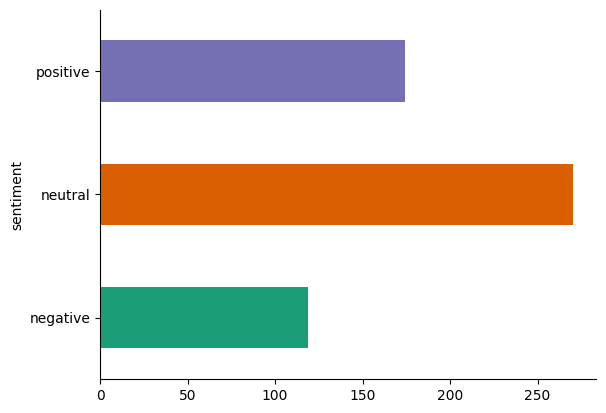

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_russian_sentiment_tweet_copy2.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(true_labels.isna().sum())  # Check NaN in true labels
print(predicted_labels.isna().sum())

0
563


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

#
true_labels = df_russian_sentiment_tweet_copy2['sentiment'].map({'negative': 0,'positive': 2})
predicted_labels = df_russian_sentiment_tweet_copy2['predicted_sentiment'].map({'negative': 0, 'positive': 2}).fillna(1)
# Calculate  metrics
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)


print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.3108881207900567
Precision: 0.22999094548678262
Recall: 0.47957371225577267
Accuracy: 0.47957371225577267


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Further Fine Tuning

Run fine-tuning for augmented data

Augment Train data

In [66]:
import swifter  # Make sure swifter is installed
import pandas as pd
import json
import uuid

# Create an instance of the DataAugmentor class
augmentor = DataAugmentor("ru")  # Assuming 'ru' for Russian

# Load data from JSON file
with open('/content/drive/MyDrive/Colab Notebooks/sentiment-analysis-in-russian/train.json', 'r') as f:
    data = json.load(f)

df_russian_sentiment_tweets2 = pd.DataFrame(data)
df_russian_sentiment_tweets2 = df_russian_sentiment_tweets2[df_russian_sentiment_tweets2['text'].str.len() <= 512]

df_to_augment = df_russian_sentiment_tweets2.copy()

def augment_row(row):
    new_rows = []
    original_text = row['text']
    augmented_texts = augmentor.replace_word_with_synonym(original_text)

    for augmented_text in augmented_texts:
        if augmented_text != original_text:  # Add only if text is modified
            new_id = uuid.uuid4().int  # Generate unique ID
            new_row = row.copy()  # Copy original row
            new_row['id'] = new_id  # Assign new ID
            new_row['text'] = augmented_text  # Update with augmented text
            new_row['sentiment'] = row['sentiment']
            new_rows.append(new_row)

    return new_rows

augmented_rows = df_to_augment.swifter.apply(augment_row, axis=1)

flat_new_rows = [item for sublist in augmented_rows if sublist for item in sublist]

df_to_augment = pd.concat([df_to_augment, pd.DataFrame(flat_new_rows)], ignore_index=True)
df_russian_sentiment_tweets2 = df_russian_sentiment_tweets2.iloc[563:]

display(df_to_augment)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Pandas Apply:   0%|          | 0/563 [00:00<?, ?it/s]

text  \
0     "–°–∞–º—Ä—É–∫-–≠–Ω–µ—Ä–≥–æ" –≤ I –∫–≤–∞—Ä—Ç–∞–ª–µ –ø–æ—á—Ç–∏ –≤–¥–≤–æ–µ —Å–Ω–∏–∑–∏...   
1     /KASE, 29.12.16/ ‚Äì –ê–û "KEGOC" (–ê—Å—Ç–∞–Ω–∞), —Ü–µ–Ω–Ω—ã–µ...   
2     –û–ø–ª–∞—á–∏–≤–∞–π—Ç–µ –±–µ–∑ –∫–æ–º–∏—Å—Å–∏–π ¬´–ö–∞–∑–∞—Ö—Ç–µ–ª–µ–∫–æ–º¬ª –Ω–∞ —Å–∞–π...   
3     03.02.2017, 12:40\n–ù–∞—Ü–±–∞–Ω–∫ —Å—Ç–∞–≤–∏—Ç –¥–ª—è —Å–µ–±—è –ø—Ä–∏...   
4     10.01.2017, 19:11\n–°—É–¥ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª –∑–∞—è–≤–ª–µ–Ω...   
...                                                 ...   
3372  –í –ï–ù–ü–§ –Ω–∞–∑–Ω–∞—á–µ–Ω –Ω–æ–≤—ã–π –ø—Ä–µ–¥—Å–µ–¥–∞—Ç–µ–ª—å –ø—Ä–∞–≤–ª–µ–Ω–∏—è. ...   
3373  –í –ï–ù–ü–§ –Ω–∞–∑–Ω–∞—á–µ–Ω –Ω–æ–≤—ã–π –ø—Ä–µ–¥—Å–µ–¥–∞—Ç–µ–ª—å –ø—Ä–∞–≤–ª–µ–Ω–∏—è. ...   
3374  –í –ï–ù–ü–§ –Ω–∞–∑–Ω–∞—á–µ–Ω –Ω–æ–≤—ã–π –ø—Ä–µ–¥—Å–µ–¥–∞—Ç–µ–ª—å –ø—Ä–∞–≤–ª–µ–Ω–∏—è. ...   
3375  –í –ï–ù–ü–§ –Ω–∞–∑–Ω–∞—á–µ–Ω –Ω–æ–≤—ã–π –ø—Ä–µ–¥—Å–µ–¥–∞—Ç–µ–ª—å –ø—Ä–∞–≤–ª–µ–Ω–∏—è. ...   
3376  –í –ï–ù–ü–§ –Ω–∞–∑–Ω–∞—á–µ–Ω –Ω–æ–≤—ã–π –ø—Ä–µ–¥—Å–µ–¥–∞—Ç–µ–ª—å –ø—Ä–∞–≤–ª–µ–Ω–∏—è. ...   

                                           id sentiment  
0                                        1983  negative  
1                                        2032  negative  
2                                        2054  positive  
3                                        2055  positive  
4                                        2071  negative  
...                                       ...       ...  
3372  238523684021034673527347499904538094533   neutral  
3373   89810488320474108618459309211632767996   neutral  
3374  143588217067947952988229083109690842403   neutral  
3375  163556881971185298053777617831514942745   neutral  
3376  312659852170716443358434829563289438685   neutral  

[3377 rows x 3 columns]

Run random_deletion on augmented data to increase training data size for fine-tuning

In [ ]:
!pip install transformers datasets
import pandas as pd
import json
from transformers import AutoModelForMaskedLM, AutoTokenizer
import random
import uuid
import nltk
from nltk.tokenize import word_tokenize
import swifter

nltk.download('punkt')

augmentor = DataAugmentor("ru")

def augment_row(row):
    augmented_rows = []
    original_text = row['text']

    # Apply random_deletion
    words = word_tokenize(original_text)  # Tokenize the text
    augmented_text = augmentor.random_deletion(words)  # Apply random_deletion
    if augmented_text != original_text:  # Add only if text is modified
        new_id = uuid.uuid4().int  # Generate unique ID
        new_row = row.copy()
        new_row['id'] = new_id
        new_row['text'] = augmented_text
        new_row['sentiment'] = row['sentiment']
        augmented_rows.append(new_row)

    # Apply replace_word_with_synonym
    augmented_texts = augmentor.replace_word_with_synonym(original_text)
    for augmented_text in augmented_texts:
        if augmented_text != original_text:  # Add only if text is modified
            new_id = uuid.uuid4().int
            new_row = row.copy()
            new_row['id'] = new_id
            new_row['text'] = augmented_text
            new_row['sentiment'] = row['sentiment']
            augmented_rows.append(new_row)

    return augmented_rows

augmented_rows = df_to_augment.swifter.apply(augment_row, axis=1)
flat_new_rows = [item for sublist in augmented_rows if sublist for item in sublist]
df_to_augment = pd.concat([df_russian_sentiment_tweets2, pd.DataFrame(flat_new_rows)], ignore_index=True)

display(df_to_augment)

Fine tune again & run test

# Phase 2: Fine tune "fine_tuned_ru_model" further

In [67]:
import pandas as pd
from datasets import Dataset
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoTokenizer
from sklearn.model_selection import train_test_split
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


model_name = "fine_tuned_rubert_model"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_to_augment['label'] = df_to_augment['sentiment'].map(label_mapping)
df_to_augment = df_to_augment.copy()

dataset = Dataset.from_pandas(df_to_augment[['text', 'label']])

def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=128)

encoded_dataset = dataset.map(preprocess_function, batched=True)

train_test_split = encoded_dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = train_test_split['train']
eval_dataset = train_test_split['test']

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",  # Disable Weights & Biases integration
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=1,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    dataloader_num_workers=2,
    max_steps=2,
    fp16=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

train_results = trainer.train()
eval_results = trainer.evaluate()

print(eval_results)

trainer.train()

model.save_pretrained("phase2_fine_tuned_rubert_model")
tokenizer.save_pretrained("phase2_fine_tuned_rubert_model")

Map:   0%|          | 0/3377 [00:00<?, ? examples/s]

max_steps is given, it will override any value given in num_train_epochs


{'eval_loss': 1.9218146800994873, 'eval_accuracy': 0.25, 'eval_f1': 0.19512086894160147, 'eval_precision': 0.3524571487774623, 'eval_recall': 0.25, 'eval_runtime': 342.2337, 'eval_samples_per_second': 1.975, 'eval_steps_per_second': 0.988, 'epoch': 0.0014803849000740192}


('phase2_fine_tuned_rubert_model/tokenizer_config.json',
 'phase2_fine_tuned_rubert_model/special_tokens_map.json',
 'phase2_fine_tuned_rubert_model/vocab.txt',
 'phase2_fine_tuned_rubert_model/added_tokens.json',
 'phase2_fine_tuned_rubert_model/tokenizer.json')

# Run tests on Tweets Again to see if there is a difference

In [73]:
import pandas as pd
import swifter
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

model_path = "phase2_fine_tuned_rubert_model"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

sentiment_pipeline = pipeline("text-classification", model=model, tokenizer=tokenizer)
russian_tweet_set_copy = russian_tweet_set.head(1000).copy()

def get_sentiment(row):
    content = row['content']
    language = row['language']

    if language == 'English':
        doc = nlp_en(content)
        sentiment = extract_sentiment(doc, 'English')
        return sentiment

    elif language == 'Russian':
        sentiment_result = sentiment_pipeline(content)[0]['label']

        if sentiment_result == 'NEGATIVE':
            return 'negative'
        elif sentiment_result == 'NEUTRAL':
            return 'neutral'
        elif sentiment_result == 'POSITIVE':
            return 'positive'

    return None

russian_tweet_set_copy['sentiment'] = russian_tweet_set_copy.swifter.apply(get_sentiment, axis=1)

display(russian_tweet_set_copy)

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

content   region language  \
0     "We have a sitting Democrat US Senator on tria...  Unknown  English   
1     Marshawn Lynch arrives to game in anti-Trump s...  Unknown  English   
2     Daughter of fallen Navy Sailor delivers powerf...  Unknown  English   
3     JUST IN: President Trump dedicates Presidents ...  Unknown  English   
4     19,000 RESPECTING our National Anthem! #StandF...  Unknown  English   
...                                                 ...      ...      ...   
4043  –õ–æ–Ω–¥–æ–Ω—Å–∫–∞—è –ø–æ–ª–∏—Ü–∏—è —Å–æ—Ä–µ–≤–Ω—É–µ—Ç—Å—è –≤ —Ç–∞–Ω—Ü–∞—Ö —Å –∂–∏—Ç–µ...  Unknown  Russian   
4044  –ü–æ–ª–∫–æ–≤–Ω–∏–∫–∞ –°–ö –ø–æ–¥–æ–∑—Ä–µ–≤–∞—é—Ç –≤ –ø–æ–ª—É—á–µ–Ω–∏–∏ –≤–∑—è—Ç–æ–∫ —â...  Unknown  Russian   
4045  –í –û—Ä–µ–Ω–±—É—Ä–≥–µ –æ—Ñ–∏—Ü–µ—Ä –ø–æ–ª—É—á–∏–ª —É—Å–ª–æ–≤–Ω—ã–π —Å—Ä–æ–∫ –∑–∞ –¥–æ...  Unknown  Russian   
4046  "–ü—É—Ç–∏–Ω –ª–∏—á–Ω–æ –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç –ª–µ—á–µ–Ω–∏–µ –æ–Ω–∫–æ–±–æ–ª—å–Ω–æ–π ...  Unknown  Russian   
4047  –¢–µ—Ä–∞–∫—Ç –ò–ì–ò–õ –≤ –õ–æ–Ω–¥–æ–Ω–µ- –ø–æ–≥–∏–±–ª–æ 7 —á–µ–ª–æ–≤–µ–∫. –†–æ—Å—Å...  Unknown  Russian   

         publish_date   harvested_date  following  followers post_type  \
0     10/1/2017 19:58  10/1/2017 19:59       1052       9636       NaN   
1     10/1/2017 22:43  10/1/2017 22:43       1054       9637       NaN   
2     10/1/2017 22:50  10/1/2017 22:51       1054       9637   RETWEET   
3     10/1/2017 23:52  10/1/2017 23:52       1062       9642       NaN   
4      10/1/2017 2:13   10/1/2017 2:13       1050       9645   RETWEET   
...               ...              ...        ...        ...       ...   
4043  6/30/2017 16:54  6/30/2017 17:31       2833      11360       NaN   
4044   6/30/2017 8:12   6/30/2017 8:24       2818      11342       NaN   
4045   6/30/2017 9:18  6/30/2017 10:49       2819      11345       NaN   
4046   6/30/2017 9:45  6/30/2017 10:31       2819      11343       NaN   
4047   6/4/2017 17:28   6/4/2017 21:06       4982       5805       NaN   

     sentiment  
0     positive  
1      neutral  
2     positive  
3      neutral  
4      neutral  
...        ...  
4043  negative  
4044  positive  
4045  negative  
4046  negative  
4047  negative  

[1000 rows x 9 columns]

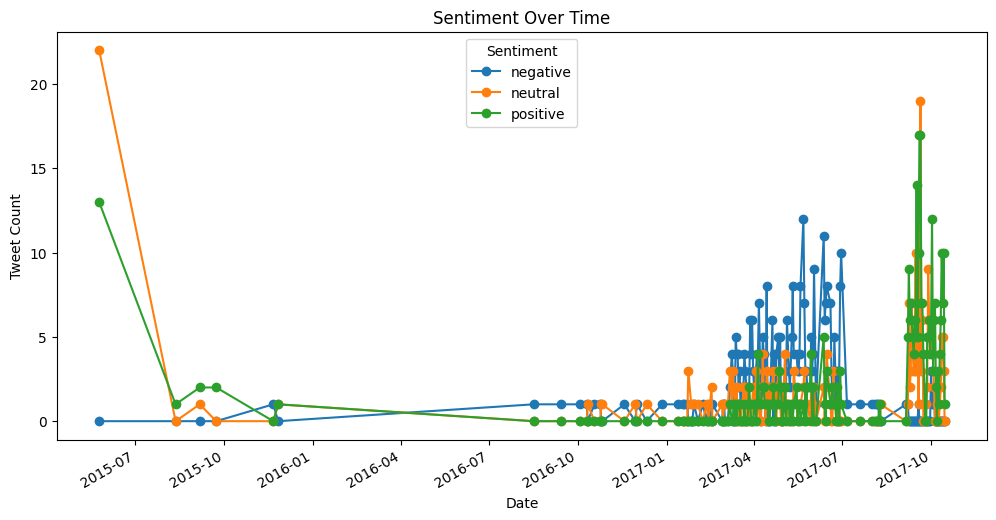

In [74]:
russian_tweet_set_copy['publish_date'] = pd.to_datetime(russian_tweet_set_copy['publish_date'])
russian_tweet_set_copy.set_index('publish_date', inplace=True)

daily_sentiment = russian_tweet_set_copy.groupby([pd.Grouper(freq='D'), 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
daily_sentiment.plot(ax=plt.gca(), marker='o', linestyle='-')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.show()

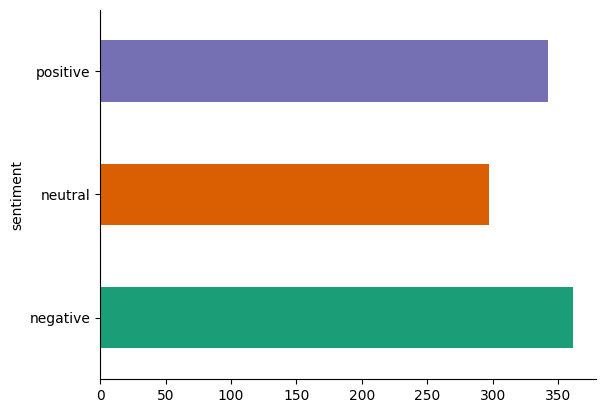

In [75]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
russian_tweet_set_copy.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

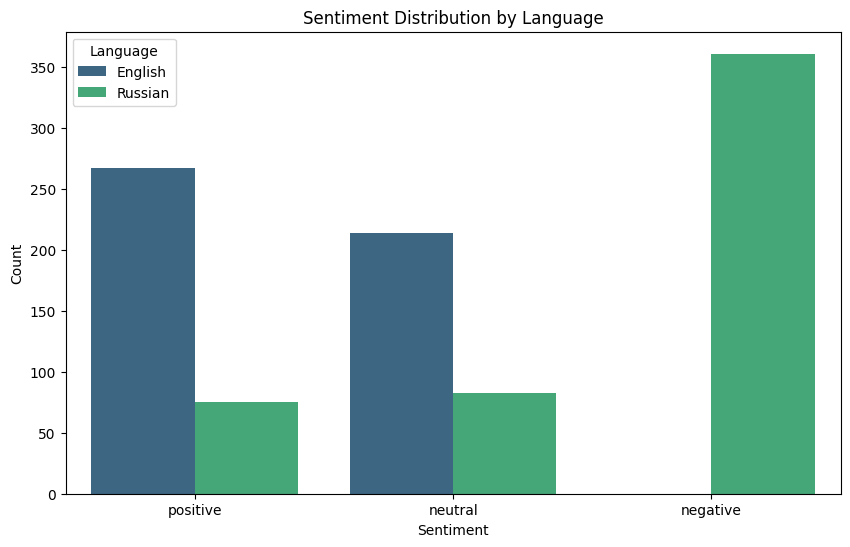

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.countplot(data=russian_tweet_set_copy, x='sentiment', hue='language', palette='viridis')
plt.title('Sentiment Distribution by Language')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Language')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
russian_tweet_set_copy['sentiment_numeric'] = russian_tweet_set_copy['sentiment'].map(sentiment_mapping)

plt.figure(figsize=(12, 6))
plt.scatter(russian_tweet_set_copy.index, russian_tweet_set_copy['sentiment_numeric'],
            c=russian_tweet_set_copy['sentiment_numeric'], cmap='viridis', alpha=0.6)

plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.yticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])
plt.colorbar(label='Sentiment')
plt.show()

# UNIT TESTS



Data Processor Unit Tests

In [ ]:
import unittest

class TestDataPreprocessor(unittest.TestCase):

    def setUp(self):
        self.preprocessor_en = DataPreprocessor(lang='en')
        self.preprocessor_ru = DataPreprocessor(lang='ru')

    def test_clean_text(self):
        text = "THiS %$ is a test for  #unit test"
        cleaned_text = self.preprocessor_en.clean_text(text)
        expected = "test test"  # Remove stop words, symbols, etc.
        self.assertEqual(cleaned_text, expected)

    def test_remove_special_chars(self):
        text = "Test @this characters and urls https://exampleurl.com"
        cleaned_text = self.preprocessor_en.remove_special_chars(text)
        expected = "Test  characters and urls "
        self.assertEqual(cleaned_text, expected)

    def test_spell_check(self):

        text = "tht exmpl works"
        corrected_text = self.preprocessor_en.spell_check(text)
        expected = "the example works"
        self.assertEqual(corrected_text, expected)

    def test_apply_encoding(self):
        text = "Hello World! üåç"
        encoded_text = self.preprocessor_en.apply_encoding(text)
        expected = "Hello World! üåç"  # UTF-8 encoding should keep emoji intact
        self.assertEqual(encoded_text, expected)

    def test_remove_stop_words_en(self):
        text = "This is a sample text with stop words"
        filtered_text = self.preprocessor_en.remove_stop_words(text)
        expected = "This sample text stop words"
        self.assertEqual(filtered_text, expected)

    def test_remove_stop_words_ru(self):
        text = "–≠—Ç–æ –ø—Ä–∏–º–µ—Ä —Ç–µ–∫—Å—Ç–∞ —Å —Å—Ç–æ–ø —Å–ª–æ–≤–∞–º–∏"
        filtered_text = self.preprocessor_ru.remove_stop_words(text)
        expected = "–≠—Ç–æ –ø—Ä–∏–º–µ—Ä —Ç–µ–∫—Å—Ç–∞ —Å—Ç–æ–ø —Å–ª–æ–≤–∞–º–∏"  # '—Å' is a stop word in Russian
        self.assertEqual(filtered_text, expected)



In [ ]:
# Create a test suite
suite = unittest.TestSuite()

# Add tests to the suite
suite.addTest(unittest.makeSuite(TestDataPreprocessor))

# Create a test runner and run the suite
runner = unittest.TextTestRunner()
result = runner.run(suite)